In [851]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
import pygam
from pygam import LinearGAM, s

I just wanted to see if the monotonic splines would do well where we have problems fitting leaves.
It seems to do well, but the `lam` parameter controlling the smoothing needs some tuning.
If it's too low you tend to get very wonky fits.

The functions below get generated automatically, so you can re-run the cell often to get a good idea of the behaviour.

I find that the splines almost always give better results when the curve has very odd tails.

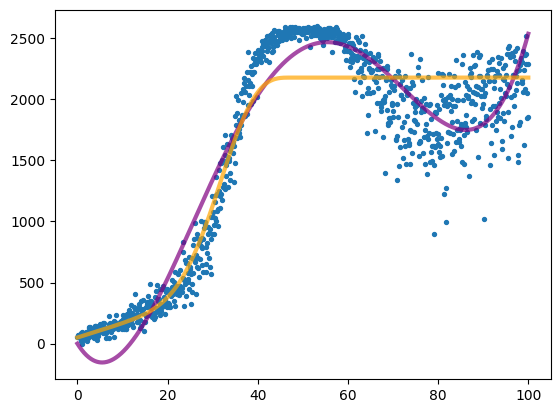

In [1012]:
xs = np.linspace(0, 100, num = 1000)
ys = 0.5 * (xs ** 1.5)

normal_center = np.random.uniform(20, 70)
hist = np.histogram(np.sort(np.random.normal(normal_center, np.random.uniform(2, 20), size=np.random.randint(np.size(xs), 1000 * np.size(xs)))), np.size(xs))[0]
ys = ys + hist

ys = ys + (5 + xs * 0.5) * np.random.normal(50, 10, size=ys.size)
upper = np.random.choice([np.random.randint(int(0.6 * np.size(ys)), np.size(ys) - 10), np.argmax(hist)], p=[0.8, 0.2])
uv = ys[upper]

lower = np.random.randint(0, int(0.2 * np.size(ys)))
lv = ys[lower]

mid = (uv + lv) / 2

scl = max([uv - mid, mid - lv])


ys = sp.special.expit((ys - mid) / scl) * np.mean(ys[upper:])
ys = ys - ys.min()

plt.scatter(xs, ys, s=8)

# complex quadratic function
fun = lsq_linear(np.stack([xs, xs ** 2, xs ** 3, xs ** 4], axis=1), ys)
zs = (np.stack([xs, xs ** 2, xs ** 3, xs ** 4], axis=1) * fun.x).sum(axis=1)
plt.plot(xs, zs, color="purple", lw=3, alpha=0.7)

# GAM/Spline
gam = LinearGAM(s(0, constraints="monotonic_inc", penalties="derivative", lam=10)).fit(xs, ys)
zs = gam.predict(xs)
plt.plot(xs, zs, color="orange", lw=3, alpha=0.7)